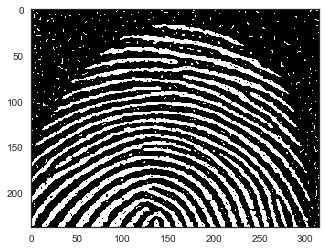

In [2]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy.linalg import solve
import seaborn as sns
sns.set_style("white")
im = Image.open('C:/Users/user/Documents/DIP/DIP3E_Original_Images_CH09/Fig0911(a)(noisy_fingerprint).tif')
im = np.asarray(im.convert('L'))
plt.imshow(im)
plt.gray()
plt.show()

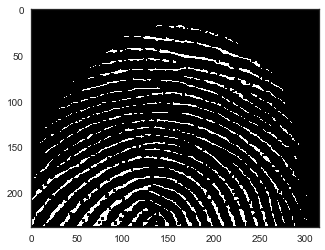

In [ ]:
def dilation(im,size=(3,3)):    
    filter_size = (size[0],size[1])
    half_filter = np.int((filter_size[0]-1)/2)
    average_filter = np.ones(filter_size)/9
    
    #先幫原圖加上padding
    def padwithzeros(vector, pad_width, iaxis, kwargs):
        vector[:pad_width[0]] = 0
        vector[-pad_width[1]:] = 0
        return vector
    padding_f = np.lib.pad(im,half_filter,padwithzeros)
    new_pic = np.zeros(im.shape)
    it = np.nditer(new_pic,flags = ['multi_index'],op_flags = ['readwrite'])
    neighbor_area = np.zeros(filter_size)
    while not it.finished:
        neighbor_area = padding_f[it.multi_index[0]:it.multi_index[0]+filter_size[0] , it.multi_index[1]:it.multi_index[1]+filter_size[0]]
        it[0] = np.max(neighbor_area.flatten())
        it.iternext()
    return new_pic
def erosion(im,size=(3,3)):
    filter_size = (size[0],size[1])
    half_filter = np.int((filter_size[0]-1)/2)
    average_filter = np.ones(filter_size)/9
    
    #先幫原圖加上padding
    def padwithzeros(vector, pad_width, iaxis, kwargs):
        vector[:pad_width[0]] = 0
        vector[-pad_width[1]:] = 0
        return vector
    padding_f = np.lib.pad(im,half_filter,padwithzeros)
    new_pic = np.zeros(im.shape)
    it = np.nditer(new_pic,flags = ['multi_index'],op_flags = ['readwrite'])
    neighbor_area = np.zeros(filter_size)
    while not it.finished:
        neighbor_area = padding_f[it.multi_index[0]:it.multi_index[0]+filter_size[0] , it.multi_index[1]:it.multi_index[1]+filter_size[0]]
        it[0] = np.min(neighbor_area.flatten())
        it.iternext()
    return new_pic

def opening(im,size=(3,3)):
    e_im = erosion(im)
    o_im = dilation(e_im)
    return e_im
plt.imshow(opening(im))
plt.gray()
plt.show()